In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [1,2,4,6,5,4,0,-4,5,-2,6,10,-9,1,3,-6]
n = len(x)

In [5]:
population_mean = np.mean(x)

## Effect of `replace=False` in `np.random.choice()`

In your notebook context, `replace=False` means that when sampling 5 elements from your list `x`, **each element can only be selected once**.

## Key differences:

**With `replace=False` (current code):**
- Sampling without replacement
- The 5 selected elements are unique (no duplicates)
- Maximum sample size is limited to the population size (16 elements in your case)
- Example: If element at index 0 is selected, it cannot be selected again

**With `replace=True`:**
- Sampling with replacement
- Elements can be selected multiple times
- You could sample 5 elements from a population of any size
- Example: The same element could appear 2 or more times in your sample



In [8]:
random_samples = np.random.choice(x, size=5, replace=False)
sample_mean = np.mean(random_samples)



This draws 5 **distinct** elements from your 16-element list. This is typical for statistical sampling where you want an unbiased sample without repetition, which helps ensure your `sample_mean` is a good estimate of the `population_mean`.

If you used `replace=True`, you might get duplicate values in your sample, which could skew the sample mean.

In [9]:
print(sample_mean)
print(population_mean)

2.2
1.625


### Draw a histogram for showing the pattern of sample means for demonstrating the LAW OF LARGE NUMBERS

In [10]:
# no of experiments
nExprmnt = 10000

sample_means = np.zeros(nExprmnt) # Creates array: [0., 0., 0., ..., 0.] (10,000 elements)


### `sample_means = np.zeros(nExprmnt)`

This line creates a NumPy array of zeros with length `nExprmnt` (10,000 in your case).

## What it does:

- **Allocates memory** for storing 10,000 values
- **Initializes all elements to 0.0** (floating-point zeros)
- **Creates a container** to hold the sample means from each of your 10,000 experiments






This pre-allocation is more efficient than appending values one by one.

In [11]:
for i in range(nExprmnt):
    samples =np.random.choice(x,size=5, replace=True)
    sample_means[i] = np.mean(samples)

Text(0.5, 0, 'Sample Mean')

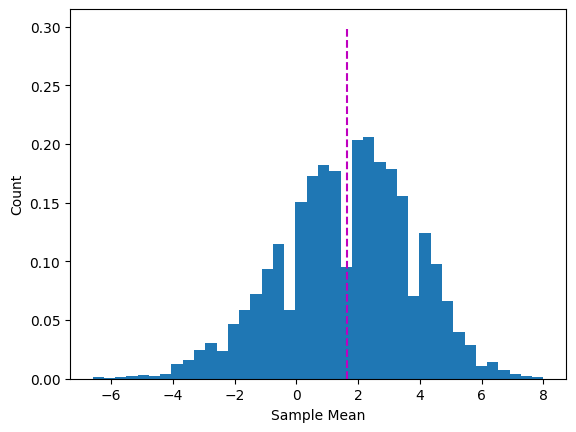

In [12]:
plt.hist(sample_means,bins=40, density=True)
plt.plot([population_mean,population_mean],[0,.3],'m--')
plt.ylabel("Count")
plt.xlabel("Sample Mean")


### How `plt.hist()` Works 




### Step-by-Step Breakdown:

### 1. **Input Data: `sample_means`**
   - This is your array of 10,000 sample means
   - Each value represents the average of a 5-element random sample
   - Example values: `[1.2, 0.8, 2.1, 1.5, 0.9, ...]`

### 2. **Binning: `bins=40`**
   - Divides the range of sample means into 40 equal-width buckets
   - If sample means range from -6 to 8, each bin width is approximately 0.35
   - **What happens**: The function counts how many sample means fall into each bucket
   
   **Visual example:**


In [ ]:
Bin 1: [-6 to -5.65]  → 2 values
Bin 2: [-5.65 to -5.3] → 5 values
Bin 3: [-5.3 to -4.95] → 8 values
...
Bin 20: [1.5 to 1.85]  → 1,200 values ← Peak (most sample means here!)
...
Bin 40: [7.65 to 8]    → 1 value



### 3. **Normalization: `density=True`**
   - **Without `density=True`**: Y-axis shows raw counts (0 to 1,200)
   - **With `density=True`**: Y-axis shows probability density
   - Makes the total area under all bars equal to 1
   - Allows comparison with probability distributions

### 4. **The Result**
   - Creates blue bars where:
     - **X-axis** = Sample mean values (-6 to 8)
     - **Y-axis** = How frequently each sample mean appears (probability density)
     - **Bar height** = Density of values in that range

## Why This Shows the Law of Large Numbers:

The histogram shows a **bell curve (normal distribution)** centered around your population mean because:

- Most of your 10,000 random samples produced means **close to the population mean**
- Fewer samples produced means **far from the population mean**
- The magenta line marks the exact population mean
- This bell shape proves that **random sampling reliably estimates the true population mean**

# What This Histogram Represents

This histogram is demonstrating the **Law of Large Numbers** - a fundamental statistical principle.

## The Process:

1. **Started with a population** – Your list `x` with 16 numbers
2. **Calculated the true population mean** – The average of all 16 numbers
3. **Ran 10,000 experiments** – In each experiment:
   - Drew a random sample of 5 elements from `x`
   - Calculated the mean of those 5 elements
   - Stored that sample mean
4. **Plotted all 10,000 sample means** – This is the histogram

## What the Histogram Shows:

- **Blue bars** – Show how many times each sample mean value appeared across your 10,000 experiments
- **Magenta dashed line** – The true population mean (the actual average of all 16 numbers)
- **The bell shape** – Shows that most sample means cluster **around the population mean**, with fewer samples far away from it

## The Key Insight (Law of Large Numbers):

Even though you only sampled 5 elements at a time (not the full population), your 10,000 sample means converge toward the true population mean. This proves that:

- **Larger samples → More accurate estimates** of the true population
- **Averaging many experiments → Reliable results**
- This is why in real-world statistics, we use sampling instead of surveying entire populations!

The magenta line right in the middle of the bell curve shows your sampling strategy works perfectly. 🎯


### `plt.hist(sample_means, bins=40, density=True)`
Creates a histogram to visualize the distribution of your 10,000 sample means:

- **`sample_means`** – The data to plot (your array of 10,000 sample means)
- **`bins=40`** – Divides the data into 40 bars/buckets for better granularity
- **`density=True`** – Normalizes the histogram so the area under all bars equals 1 (creates a probability distribution instead of raw counts)

### `plt.plot([population_mean,population_mean],[0,.3],'m--')`
Draws a vertical line representing the true population mean:

- **`[population_mean, population_mean]`** – X-coordinates (same value twice = vertical line)
- **`[0, .3]`** – Y-coordinates (line extends from 0 to 0.3 on the y-axis)
- **`'m--'`** – Line style: `m` = magenta color, `--` = dashed line

This line shows where the population mean falls relative to your sample means distribution.

### `plt.ylabel("Count")`
Labels the y-axis as "Count" (though with `density=True`, it's technically probability density, not raw counts).

### `plt.xlabel("Sample Mean")`
Labels the x-axis as "Sample Mean" to indicate what values are being measured.

**Together:** These lines demonstrate the **Law of Large Numbers** by showing that your 10,000 sample means cluster around the true population mean (the magenta dashed line).